In [4]:
import pandas as pd

# caminho no seu google Drive
caminho = '/content/drive/MyDrive/DNAC2017.csv'
sinasc = pd.read_csv(caminho, dtype=str)
sinasc.IDADEMAE = pd.to_numeric(sinasc.IDADEMAE)
sinasc.head()

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2515768,110010,1,22.0,1,4,NaN,02,02,120040,6,1,2,2,17052017,1344,2,09,10,4,4085,2,25052017,NaN,20170006,3.2.01,05062017,019,NaN,812,120070,12,3,3,26081994,4,04,03,01,42,25072016,42,8,01,04,1,2,2,1,2,3,17052017,06,0,1,NaN,05,1,2
1,2,1,2516047,110018,1,30.0,2,5,NaN,01,NaN,120020,5,1,2,3,27042017,1750,2,09,10,4,3460,2,04052017,NaN,20170005,3.2.01,05052017,008,NaN,811,110018,11,5,NaN,11031987,4,01,NaN,01,28,16072016,40,8,05,03,1,2,2,1,5,4,27042017,08,0,1,NaN,05,1,3
2,3,1,5618347,110020,1,26.0,2,4,999992,03,00,120001,5,1,1,3,03012017,1830,2,08,09,4,3690,2,16012017,NaN,20170002,3.2.01,03022017,031,NaN,813,130240,13,3,3,05051990,4,03,03,00,NaN,05042016,38,8,06,05,1,2,3,1,2,4,03012017,06,0,1,NaN,03,1,2
3,4,1,5618347,110020,1,28.0,2,4,999992,00,00,120001,5,1,2,4,13022017,2025,2,08,09,4,2925,2,13032017,NaN,20170004,3.2.01,06042017,052,NaN,835,353440,35,2,8,08041988,4,00,00,00,22,15052016,38,8,07,02,1,1,2,1,2,4,18022017,04,0,1,NaN,02,0,5
4,5,1,5618347,110020,1,22.0,2,3,622020,01,00,120040,5,1,1,3,10032017,0315,1,08,09,4,3720,2,23032017,NaN,20170004,3.2.01,06042017,027,NaN,812,120040,12,2,7,03091994,4,01,01,00,28,02062016,40,8,06,04,1,2,3,1,2,3,11032017,03,0,1,NaN,03,1,2


In [5]:
intervalos = pd.cut(sinasc['IDADEMAE'],[0,9,14,19,24,29,34,39,44,49,54,59])
intervalos

0        (19, 24]
1        (29, 34]
2        (24, 29]
3        (24, 29]
4        (19, 24]
           ...   
16353    (34, 39]
16354    (24, 29]
16355    (24, 29]
16356    (29, 34]
16357    (34, 39]
Name: IDADEMAE, Length: 16358, dtype: category
Categories (11, interval[int64, right]): [(0, 9] < (9, 14] < (14, 19] < (19, 24] ... (39, 44] <
                                          (44, 49] < (49, 54] < (54, 59]]

In [6]:
faixa_etaria = sinasc.IDADEMAE.groupby(intervalos)
faixa_etaria

In [7]:
# frequência absoluta
freq_abs = faixa_etaria.agg(['count'])
freq_abs

,count
IDADEMAE,
"(0, 9]",0
"(9, 14]",280
"(14, 19]",3867
"(19, 24]",4338
"(24, 29]",3366
"(29, 34]",2624
"(34, 39]",1460
"(39, 44]",379
"(44, 49]",29


In [8]:
# frequência relativa
# x: vetor com elementos do grupo de faixa etária
freq_rel_fn = lambda x: round(x.count()/sinasc.IDADEMAE.count(),4)

freq_rel = faixa_etaria.agg([freq_rel_fn])
freq_rel

,<lambda>
IDADEMAE,
"(0, 9]",NaN
"(9, 14]",0.0171
"(14, 19]",0.2366
"(19, 24]",0.2654
"(24, 29]",0.2059
"(29, 34]",0.1605
"(34, 39]",0.0893
"(39, 44]",0.0232
"(44, 49]",0.0018


In [11]:
# frequência percentual

# freq_perc_fn = lambda x: f'{round(x.count()/sinasc.IDADEMAE.count(),4)*100}%' # mudar essa linha
freq_perc_fn = lambda x: f'{round(x.count()*100/sinasc.IDADEMAE.count(),2)}%' # mudar essa linha


freq_perc = faixa_etaria.agg([freq_perc_fn])
freq_perc 

,<lambda>
IDADEMAE,
"(0, 9]",None
"(9, 14]",1.71%
"(14, 19]",23.66%
"(19, 24]",26.54%
"(24, 29]",20.59%
"(29, 34]",16.05%
"(34, 39]",8.93%
"(39, 44]",2.32%
"(44, 49]",0.18%


In [13]:
# frequência acumulativa
freq_acc = faixa_etaria.count().cumsum().to_frame()
freq_acc

,IDADEMAE
IDADEMAE,
"(0, 9]",0
"(9, 14]",280
"(14, 19]",4147
"(19, 24]",8485
"(24, 29]",11851
"(29, 34]",14475
"(34, 39]",15935
"(39, 44]",16314
"(44, 49]",16343


In [14]:
# freqência acumulada relativa
freq_acc_rel = freq_acc/sinasc.IDADEMAE.count()
freq_acc_rel

,IDADEMAE
IDADEMAE,
"(0, 9]",0.000000
"(9, 14]",0.017130
"(14, 19]",0.253701
"(19, 24]",0.519087
"(24, 29]",0.725009
"(29, 34]",0.885538
"(34, 39]",0.974856
"(39, 44]",0.998042
"(44, 49]",0.999816


In [15]:
# frequência acumulada percentual
freq_acc_perc = round(freq_acc*100/sinasc.IDADEMAE.count(),2)
freq_acc_perc

,IDADEMAE
IDADEMAE,
"(0, 9]",0.00
"(9, 14]",1.71
"(14, 19]",25.37
"(19, 24]",51.91
"(24, 29]",72.50
"(29, 34]",88.55
"(34, 39]",97.49
"(39, 44]",99.80
"(44, 49]",99.98


In [16]:
escolaridade = sinasc.ESCMAE.groupby(sinasc.ESCMAE)
escolaridade

In [17]:
freq_acc = escolaridade.count().cumsum().to_frame()
freq_acc

,ESCMAE
ESCMAE,
1,578
2,1582
3,5963
4,13647
5,16007
9,16185


# Gráficos

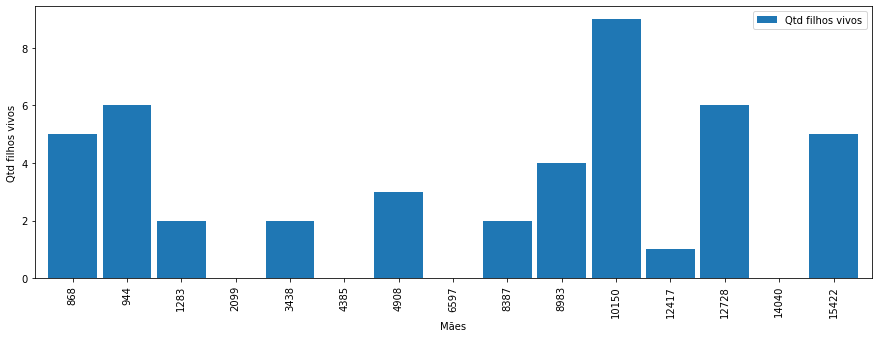

In [22]:
# filtro das mães viúvas
sinasc.QTDFILVIVO = pd.to_numeric(sinasc.QTDFILVIVO).astype(pd.Int64Dtype())
viuvas_filhosvivos = sinasc[sinasc.ESTCIVMAE == '3']['QTDFILVIVO']
barras = viuvas_filhosvivos.plot(kind = 'bar', width = 0.9, figsize = (15,5))
barras.set(xlabel = 'Mães', ylabel = 'Qtd filhos vivos')
barras.legend(['Qtd filhos vivos'])

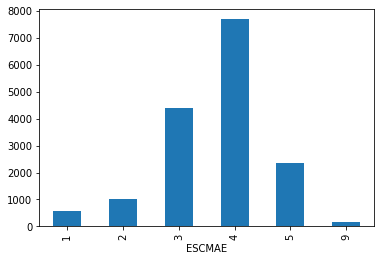

In [26]:
# Escolaridade mãe
grupo = sinasc.ESCMAE.groupby(sinasc.ESCMAE).count()
grupo.plot(kind = 'bar')

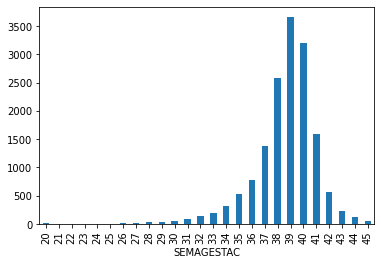

In [27]:
# Semana gestação
grupo = sinasc.SEMAGESTAC.groupby(sinasc.SEMAGESTAC).count()
grupo.plot(kind = 'bar')

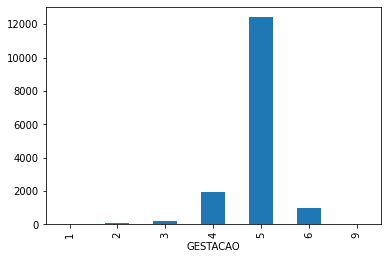

In [28]:
grupo = sinasc.GESTACAO.groupby(sinasc.GESTACAO).count()
grupo.plot(kind = 'bar')

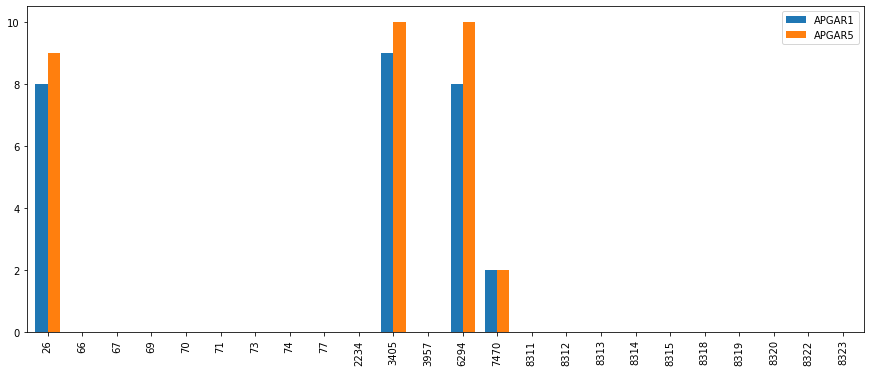

In [32]:
# Comparar duas variáveis # 1
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1)
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5)

gestacao_apgar = sinasc[sinasc.GESTACAO == '1'][['APGAR1','APGAR5']]
gestacao_apgar.plot(kind = 'bar', width = 0.7, figsize =(15,6))

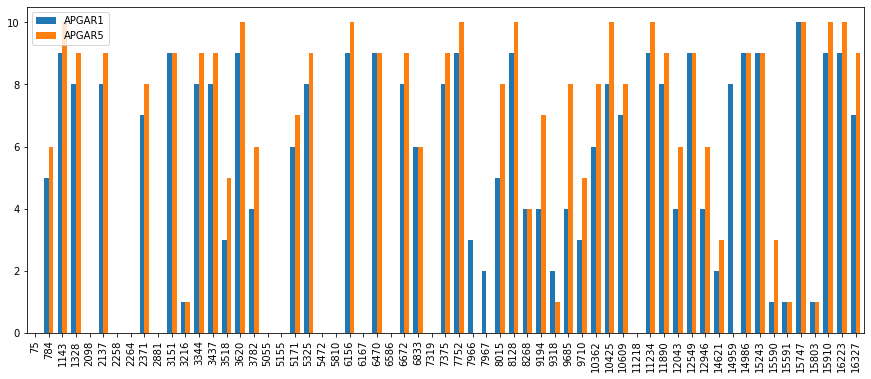

In [33]:
# Comparar duas variáveis # 2
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1)
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5)

gestacao_apgar = sinasc[sinasc.GESTACAO == '2'][['APGAR1','APGAR5']]
gestacao_apgar.plot(kind = 'bar', width = 0.7, figsize =(15,6))

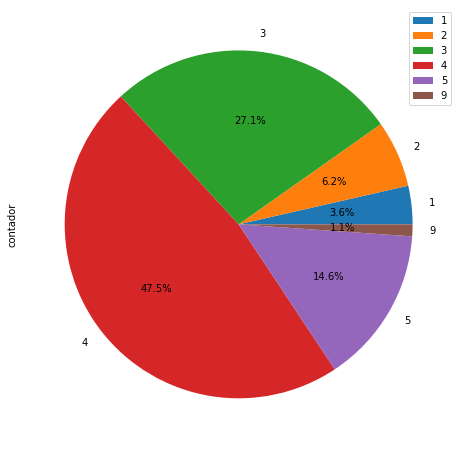

In [41]:
grupo = sinasc.groupby('ESCMAE').count()
grupo[['contador']].plot(y = 'contador', kind = 'pie', figsize =(8,8), autopct = '%1.1f%%')

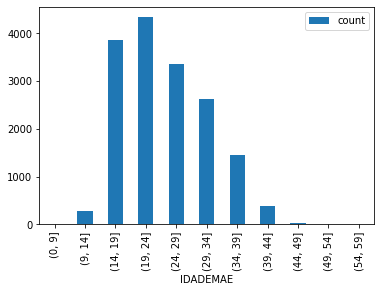

In [43]:
# Histograma
freq_abs.plot(kind='bar')

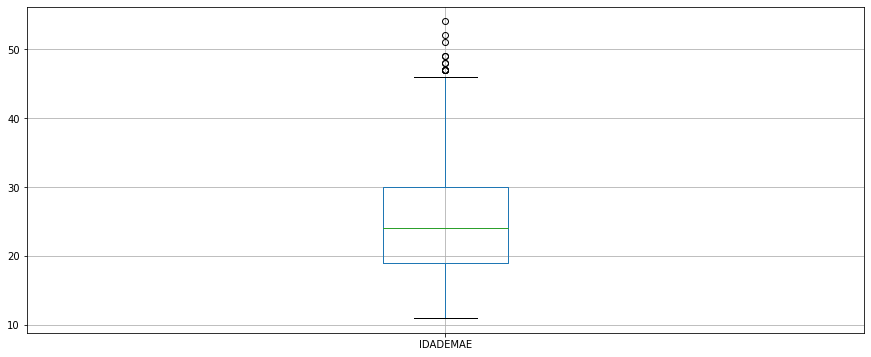

In [44]:
# boxplot
sinasc.boxplot(column=['IDADEMAE'], figsize=(15,6))

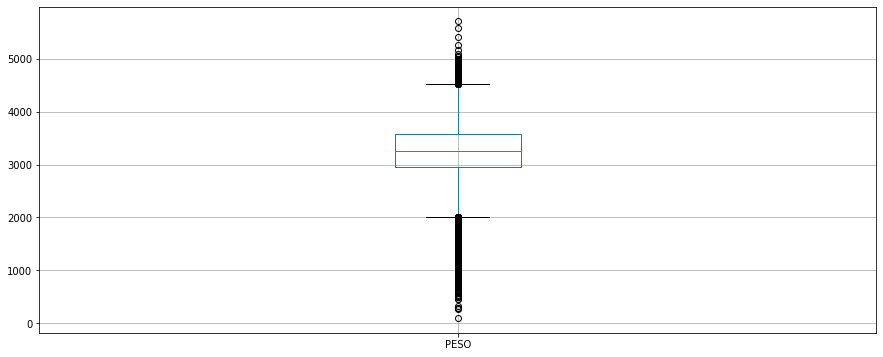

In [46]:
# boxplot
sinasc['PESO'] = pd.to_numeric(sinasc['PESO'])
sinasc.boxplot(column=['PESO'], figsize=(15,6))

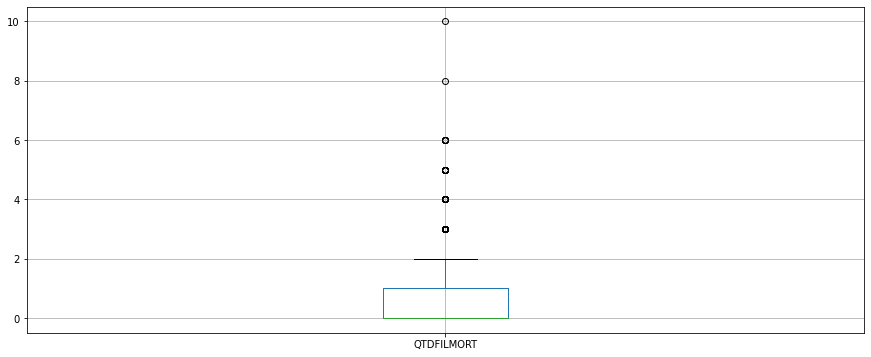

In [47]:
# boxplot
sinasc['QTDFILMORT'] = pd.to_numeric(sinasc['QTDFILMORT'])
sinasc.boxplot(column=['QTDFILMORT'], figsize=(15,6))